In [6]:
#order blast by sseqid start
import pandas as pd
blast_file = 'extras/data/tracker/blast_90_90.csv'
blast_file_orderer = 'extras/data/tracker/blast_90_90.order.csv'
df_blast = pd.read_csv(blast_file, index_col=False, sep='\t')
df_blast.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
df_blast = df_blast.sort_values(['sseqid', 'sstart'])
df_blast.to_csv(blast_file_orderer, sep="\t", index=None)
df_blast.head()


FileNotFoundError: File b'extras/data/tracker/blast_90_90.csv' does not exist

In [5]:
#order blast by sseqid start
import pandas as pd
blast_file = 'extras/data/iwgsc_cn4/blast_95.csv'
blast_file_orderer = 'extras/data/iwgsc_cn4/blast_95_95.order.csv'
df_blast = pd.read_csv(blast_file, index_col=False, sep='\t')
df_blast.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
df_blast = df_blast.sort_values(['sseqid', 'sstart'])
df_blast.to_csv(blast_file_orderer, sep="\t", index=None)
df_blast.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
820,MITE_T_11550|chr4B|491446578|491446917|ATTC|34...,chr1A,95.17,331,16,0,7,337,442471,442801,8.000000e-148,526.0
2934,MITE_T_45970|chr3B|651188527|651188767|AT|42|F...,chr1A,97.08,240,6,1,1,240,674129,674367,2.000000e-109,398.0
2963,MITE_T_45970|chr3B|651188527|651188767|AT|42|F...,chr1A,96.67,240,7,1,1,240,676678,676916,2.000000e-108,394.0
2988,MITE_T_45970|chr3B|651188527|651188767|AT|42|F...,chr1A,96.25,240,8,1,1,240,679227,679465,1.000000e-106,389.0
14809,MITE_T_100638|chr4A|274958954|274959060|ACT|25...,chr1A,95.28,106,5,0,1,106,712631,712526,6.000000e-41,168.0


Most common MITEs in wheat / TREP

In [1]:
#

Distance from MITEs to genes

In [ ]:
gene_file = '../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3'
blat_file = 'extras/data/iwgsc_cn4/blat_95_95_new.csv'
blast_file = 'extras/data/iwgsc_cn4/blast_95.csv'
genome_file = 'extras/data/iwgsc.gff3'

#for rice data
#genome_file = 'extras/data/rice.gff3.csv'
#blat_file = 'extras/data/tracker/blat_90_90.csv'
#gene_file = '../data/IRGSP-1.0_representative/locus.gff'

In [3]:
#load MITEs
import pandas as pd
import sys
df_blat = pd.read_csv(blat_file, index_col=False, sep='\t')
df_blat = df_blat[df_blat.tName != 'chrUn'].reset_index(drop=True)

In [5]:
#load MITEs in blast
import pandas as pd
import sys
df_blat = pd.read_csv(blast_file, index_col=False, sep='\t')
df_blat.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
df_blat = df_blat[df_blat.sseqid != 'chrUn'].reset_index(drop=True)

In [ ]:
#load genes
df_genes = pd.read_csv(gene_file, index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

In [8]:
#load genome structure
df_genome = pd.read_csv(genome_file, index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes_genome = {}
for k,chromosome in df_genome.iterrows():
    df_genes_genome[chromosome.seqname] = df_genes[(df_genes.seqname == chromosome.seqname)].reset_index()

In [10]:
#calculate distance to closest gene
distances = []
print(len(df_blat.index))
for k,v in df_blat.iterrows():
    midd = (v.sstart + v.send) / 2
    df_curr = df_genes_genome[v.sseqid]
    df_res = df_curr.loc[(df_curr.start - midd).abs().argsort()[:1]]
    if len(df_res.index) > 0:
        closest = (int(df_res.start) + int(df_res.end)) / 2
        distance = abs(midd - closest)
        distances.append(distance)
    else:
        print(v.qseqid, midd)
        print(df_res)
        print(df_curr)
        print('error')

682396


In [11]:
#calculate distance max and min
print(min(distances))
print(max(distances))
distances_kb = []
for d in distances:
    distances_kb.append(d/1000)

0.0
3631676.5


In [16]:
#! pip3 install seaborn
distances_kb_filtered = []
for distance_kb in distances_kb:
    if distance_kb <= 500:
        distances_kb_filtered.append(distance_kb)

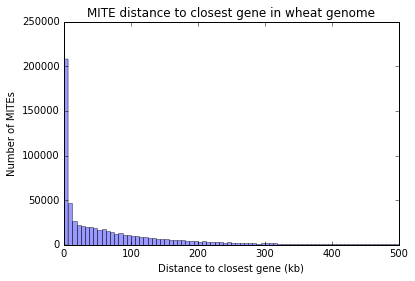

In [17]:
%matplotlib inline

# PLOT
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn histogram
sns.distplot(distances_kb_filtered, hist=True, kde=False, 
             bins=80, color = 'blue',
             hist_kws={'edgecolor':'black'},rug=False)
# Add labels
plt.title('MITE distance to closest gene in wheat genome')
plt.xlabel('Distance to closest gene (kb)')
plt.ylabel('Number of MITEs')
plt.savefig('extras/histogram.png', dpi=800,bbox_inches='tight')




Count Families

In [51]:
#count families 
import pandas as pd
import sys
df_blat = pd.read_csv('extras/data/iwgsc_cn4/blast_90_90.order.csv', index_col=False, sep='\t')
df_blat.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df_trep = pd.read_csv('extras/data/iwgsc_cn4/trep.csv', index_col=False, sep='\t')
df_trep.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

In [52]:
#order by count
s = df_blat.qseqid.value_counts()

In [53]:
df_trep[(df_trep.qseqid == 'MITE_T_90576|chr3D|581983465|581983588|TA|35|F3909')]

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
8592,MITE_T_90576|chr3D|581983465|581983588|TA|35|F...,DTT_Null_Thalos_consensus-1,95.726,117,2,1,4,120,23,136,2.850000e-48,187.0
8593,MITE_T_90576|chr3D|581983465|581983588|TA|35|F...,DTT_Null_Thalos_consensus-1,70.833,120,26,5,4,120,136,23,2.200000e-05,44.6
8594,MITE_T_90576|chr3D|581983465|581983588|TA|35|F...,DTC_Atau_Jorge_D_3D-339,92.683,123,9,0,1,123,12088,11966,1.210000e-46,181.0
8595,MITE_T_90576|chr3D|581983465|581983588|TA|35|F...,DTC_Atau_Jorge_C_3D-312,82.353,119,15,3,4,120,24040,24154,5.160000e-26,113.0
8596,MITE_T_90576|chr3D|581983465|581983588|TA|35|F...,DTC_Atau_Jorge_A_consensus-1,79.487,117,13,3,4,120,10801,10906,3.260000e-22,100.0


In [54]:
#search trep 
count = 1
results = []
for k in s.index.tolist():
#    df_blat[df_blat.qName == k].sort_values(by=['tName','tStart']).to_csv(str(count) + '.csv')
    count += 1
    trep = df_trep[df_trep.qseqid == k].reset_index(drop=True)
    trep_res = ""
    if len(trep.index) > 0:
        trep_res = trep.iloc[0].sseqid
        results.append((s[k],trep_res.split('_')[2]))
    else:
        results.append((s[k],'other'))
        print(k)

MITE_T_107873|chr6A|1090278|1090371|TA|94|F4870
MITE_T_61402|chr4D|238640163|238640349|TT|22|F2412
MITE_T_110571|chr2D|607678032|607678122|TA|96|F5026
MITE_T_109028|chr4A|536887987|536888079|AT|97|F4956
MITE_T_110551|chr4D|389092137|389092227|TA|95|F5025
MITE_T_105766|chr2D|53145720|53145816|TT|97|F4748
MITE_T_115150|chr5B|212481103|212481188|AG|85|F5237
MITE_T_113343|chr2B|179285004|179285091|GA|87|F5153
MITE_T_106360|chr7D|382748178|382748273|TAA|92|F4793
MITE_T_127300|chr3A|443850571|443851119|TA|13|F5947
MITE_T_104908|chr7B|439502556|439502653|GT|98|F4693
MITE_T_117911|chr3B|698612860|698612942|TA|86|F5390
MITE_T_107353|chr1D|415405053|415405147|TA|101|F4845
MITE_T_117900|chr6A|369574554|369574636|TA|86|F5389
MITE_T_116685|chr5D|244254210|244254293|ACT|88|F5319
MITE_T_118125|chr2A|762155266|762155348|TA|86|F5402
MITE_T_117895|chr1B|442205233|442205315|TA|87|F5388
MITE_T_80802|chr4D|492804265|492804407|TA|13|F3463
MITE_T_117820|chr4A|473505387|473505469|TA|86|F5380
MITE_T_106077|chr

MITE_T_77972|chr5B|622603714|622603869|CC|44|F3333
MITE_T_55188|chr4B|595274842|595275057|TA|94|F2181
MITE_T_77937|chr4B|531689881|531690036|CC|48|F3330
MITE_T_53235|chr7A|302408686|302408909|TA|28|F2090
MITE_T_45043|chr7A|148418499|148418742|AT|254|F1867
MITE_T_53552|chr4A|572504560|572504781|TA|100|F2108
MITE_T_78535|chr1D|434773376|434773527|TA|44|F3375
MITE_T_77932|chr1B|663081117|663081272|CC|44|F3329
MITE_T_55069|chr5A|368103141|368103356|TA|96|F2170
MITE_T_43638|chr4A|418644509|418644753|TA|257|F1857
MITE_T_58474|chr1D|377998855|377999058|AT|32|F2236
MITE_T_45892|chr6A|97698808|97699049|AA|245|F1912
MITE_T_77912|chr4B|405055686|405055841|GC|45|F3328
MITE_T_78399|chr5B|547355606|547355758|TA|45|F3366
MITE_T_59133|chr3A|206940921|206941119|AC|27|F2283
MITE_T_50671|chr4D|7763632|7763869|TA|244|F1980
MITE_T_35216|chr7B|699405941|699406212|AT|47|F1447
MITE_T_8885|chr1A|134354378|134354736|AG|15|F500
MITE_T_5662|chr2D|56325970|56326354|AAG|70|F341
MITE_T_103348|chr2A|618975025|6189751

MITE_T_59967|chr5B|546410663|546410855|TCCT|27|F2341
MITE_T_53600|chr6A|109177963|109178183|GA|227|F2110
MITE_T_26607|chr2D|418363234|418363525|TTG|111|F1067
MITE_T_111462|chr3B|421578061|421578150|TA|93|F5086
MITE_T_31645|chr2D|481281926|481282202|TCT|285|F1267
MITE_T_5639|chr3A|638057676|638058061|CG|10|F339
MITE_T_66350|chr1D|326157572|326157743|TAC|17|F2693
MITE_T_60905|chr2B|49139381|49139569|CTGGAGAA|22|F2385
MITE_T_5991|chr3A|9037845|9038227|TTA|16|F356
MITE_T_123058|chr2B|784283983|784284031|GC|18|F5766
MITE_T_21476|chr2A|150181259|150181566|TTA|15|F873
MITE_T_78088|chr1A|7664802|7664956|GC|37|F3340
MITE_T_78195|chr3A|434834927|434835081|GC|36|F3345
MITE_T_29935|chr3B|192110358|192110638|AT|53|F1202
MITE_T_60950|chr4A|249491657|249491845|CCCCACAT|22|F2389
MITE_T_28716|chr5D|124043313|124043596|ATC|14|F1159
MITE_T_38051|chr6B|152385819|152386082|CT|276|F1573
MITE_T_30931|chr7B|43499587|43499865|ATT|51|F1242
MITE_T_78374|chr7A|542967863|542968016|GC|38|F3362
MITE_T_77881|chr7A|30

MITE_T_2970|chr5B|241679449|241679867|ATATAT|68|F196
MITE_T_104708|chr4A|644660266|644660363|TT|98|F4679
MITE_T_82262|chr7B|506726675|506726809|AT|25|F3559
MITE_T_3532|chr2B|205641692|205642101|TCG|14|F231
MITE_T_10847|chr2A|78550958|78551302|AT|11|F570
MITE_T_65312|chr5A|702727787|702727960|AT|22|F2641
MITE_T_21794|chr3A|427766561|427766867|TA|24|F889
MITE_T_33608|chr4D|325892174|325892447|AAT|24|F1353
MITE_T_50289|chr1D|68379939|68380177|TA|245|F1966
MITE_T_77345|chr6A|46592910|46593068|TA|44|F3287
MITE_T_35667|chr2B|480967293|480968039|GC|13|F1469
MITE_T_4851|chr2D|11204193|11204586|GC|10|F292
MITE_T_8001|chr5D|540222638|540223005|GTGCAC|69|F457
MITE_T_52754|chr3B|823595238|823595466|GC|233|F2057
MITE_T_28574|chr3A|502398298|502398582|TGA|21|F1143
MITE_T_76809|chr7D|572755059|572755218|TA|41|F3238
MITE_T_122376|chr3B|520447969|520448035|TA|71|F5709
MITE_T_82196|chr4B|325710572|325710706|TG|145|F3556
MITE_T_55035|chr5A|285786742|285786957|TA|230|F2168
MITE_T_74902|chr2D|22200799|2220

MITE_T_82952|chr2B|710008031|710008162|TAGT|12|F3591
MITE_T_122550|chr4D|499418998|499419700|GAGGCATT|11|F5740
MITE_T_6078|chr6A|2750192|2750572|TCTCAT|17|F366
MITE_T_7641|chr3D|19786930|19787299|TA|10|F438
MITE_T_41460|chr1A|578924558|578924814|TA|266|F1757
MITE_T_116906|chr4A|642446065|642446148|AT|87|F5323
MITE_T_77788|chr1B|150543235|150543391|AT|18|F3320
MITE_T_6509|chr1D|356358156|356358535|TTCCGGAA|10|F378
MITE_T_54495|chr3B|81823894|81824112|TA|226|F2141
MITE_T_53526|chr1A|536569456|536569677|TA|78|F2105
MITE_T_53074|chr7D|411305730|411305955|GC|234|F2077
MITE_T_67628|chr7B|471021156|471021325|AT|36|F2741
MITE_T_39138|chr3B|557807925|557808187|TA|40|F1621
MITE_T_91108|chr7A|105170283|105170405|TA|20|F3951
MITE_T_122544|chr7B|355482993|355483052|TA|65|F5739
MITE_T_122797|chr5D|174010604|174010657|TA|13|F5756
MITE_T_463|chr1B|316237701|316238164|GCTGGG|26|F48
MITE_T_112058|chr3B|3251000|3251088|AT|93|F5111
MITE_T_7042|chr1D|260402550|260402924|CGG|86|F406
MITE_T_65137|chr2D|33774

MITE_T_58879|chr6D|41542478|41542678|TA|31|F2259
MITE_T_59703|chr2D|627580950|627581143|TAA|16|F2322
MITE_T_41543|chr2D|629213979|629214234|TA|265|F1764
MITE_T_100779|chr2A|246043261|246043366|GC|110|F4427
MITE_T_78689|chr4A|605661423|605661574|AT|51|F3381
MITE_T_103301|chr1D|360478835|360478935|AC|100|F4605
MITE_T_138|chr2A|185965170|185965650|GA|24|F17
MITE_T_5526|chr3B|772005577|772005962|GC|14|F334
MITE_T_106473|chr4A|636365130|636365225|AT|100|F4801
MITE_T_59144|chr2B|280479760|280479957|TCA|23|F2285
MITE_T_120622|chr6B|255535421|255535502|TA|85|F5512
MITE_T_54586|chr6B|572568534|572568751|TT|41|F2149
MITE_T_127648|chr6A|375530867|375531398|CCTA|13|F5968
MITE_T_82266|chr2A|710800220|710800354|AT|27|F3560
MITE_T_118184|chr7D|45182696|45182778|TA|88|F5407
MITE_T_58158|chr2D|446317622|446317827|AT|219|F2230
MITE_T_18880|chr7A|304324816|304325131|CTG|23|F793
MITE_T_116128|chr3A|647465715|647465799|AT|88|F5291
MITE_T_5483|chr7B|10967466|10967851|TA|21|F332
MITE_T_120952|chr5D|297499827

MITE_T_110766|chr6D|87467520|87467610|AT|96|F5041
MITE_T_11094|chr7B|505474754|505475095|AG|26|F584
MITE_T_79068|chr5D|23153848|23153998|TA|41|F3401
MITE_T_7566|chr6B|171442965|171443334|TTA|18|F431
MITE_T_2252|chr5B|93412656|93413085|GG|29|F154
MITE_T_126155|chr2B|695687217|695687807|TA|17|F5888
MITE_T_120811|chr3D|25130690|25130771|TA|85|F5528
MITE_T_126060|chr5A|658491604|658492196|AT|10|F5886
MITE_T_37196|chr6A|337753619|337753884|AC|268|F1531
MITE_T_95693|chr3B|31255957|31256071|TAACTAC|24|F4188
MITE_T_22970|chr5A|493341243|493341543|AT|87|F950
MITE_T_6182|chr7B|589393068|589393448|AGCT|163|F368
MITE_T_73525|chr4D|44750657|44750820|TA|52|F3010
MITE_T_81344|chr1B|587986728|587986866|CG|33|F3500
MITE_T_127549|chr2B|528281019|528281560|CATG|22|F5959
MITE_T_45694|chr3A|212740222|212740463|GG|24|F1895
MITE_T_27635|chr1B|359071987|359072274|AT|25|F1100
MITE_T_2483|chr3A|80389973|80390738|ACT|33|F163
MITE_T_77019|chr2A|30304905|30305063|CTAG|40|F3262
MITE_T_14151|chr3B|24919274|24919604|

MITE_T_59924|chr7B|382161099|382161291|GTC|27|F2336
MITE_T_118268|chr5B|712959901|712959983|TA|88|F5416
MITE_T_80609|chr2B|735518005|735518149|AT|36|F3449
MITE_T_69675|chr5A|586165615|586165782|AGCAAA|22|F2839
MITE_T_127627|chr4A|732299843|732300375|GCCATGGC|166|F5967
MITE_T_127224|chr3A|11077866|11078416|AG|16|F5943
MITE_T_41627|chr3B|687075681|687075936|TA|64|F1766
MITE_T_81763|chr2A|28708021|28708157|AGT|19|F3526
MITE_T_127179|chr1B|7767379|7767931|TG|16|F5940
MITE_T_954|chr1D|349474310|349474757|TT|12|F89
MITE_T_62254|chr3A|552484174|552484356|ATAT|22|F2472
MITE_T_53314|chr4B|473905507|473905730|GA|14|F2092
MITE_T_40853|chr6A|589344834|589345092|TACTA|36|F1713
MITE_T_1821|chr7B|700280561|700280995|GC|452|F132
MITE_T_124303|chr5A|475654593|475655247|AAA|14|F5824
MITE_T_9212|chr1D|347440794|347441147|AA|362|F523
MITE_T_22637|chr2B|607947534|607947836|TA|31|F932
MITE_T_76|chr7D|305126756|305127239|TAA|31|F12
MITE_T_68703|chr7B|4396179|4396347|AT|17|F2781
MITE_T_81874|chr5D|382495070|3

MITE_T_2913|chr6A|608969693|608970112|GCGAC|438|F194
MITE_T_21345|chr5D|55587099|55587407|TT|100|F866
MITE_T_123298|chr4A|606408712|606409400|CTTTTAGC|13|F5781
MITE_T_67544|chr1B|16262281|16262450|AGT|11|F2731
MITE_T_5071|chr1D|29992638|29993028|AACC|16|F308
MITE_T_125191|chr4D|381901514|381902297|GC|28|F5856
MITE_T_62162|chr2D|436161581|436161764|AAT|39|F2465
MITE_T_122693|chr5A|576587622|576588324|CATG|10|F5742
MITE_T_123214|chr6B|645522142|645522836|AATT|14|F5775
MITE_T_62389|chr6D|322588827|322589009|GGA|38|F2478
MITE_T_127768|chr7D|95569651|95570174|TT|532|F5978
MITE_T_59361|chr2D|576972397|576973132|GC|11|F2294
MITE_T_22789|chr2A|11647216|11647517|AT|313|F936
MITE_T_16886|chr6A|435563697|435564022|TA|46|F711
MITE_T_26174|chr7A|115741853|115742145|TAA|49|F1053
MITE_T_13826|chr4B|494689937|494690268|CT|26|F654
MITE_T_514|chr2D|638881086|638881549|GTGCTGAG|22|F49
MITE_T_1900|chr3A|735405311|735405744|TTA|62|F136
MITE_T_3766|chr6B|20079768|20080175|TTA|17|F236
MITE_T_6214|chr7A|61302

MITE_T_74315|chr4B|592674885|592675047|TATT|15|F3047
MITE_T_50944|chr1D|58874462|58874698|TA|245|F2001
MITE_T_20016|chr6A|560640292|560640604|CTGG|16|F824
MITE_T_2248|chr4D|48638359|48638788|TCA|12|F153
MITE_T_83280|chr3D|439812721|439812852|GC|17|F3608
MITE_T_127793|chr7D|37545737|37546258|CTGGAA|17|F5981
MITE_T_3156|chr3A|678000631|678001395|AATAATGAG|113|F207
MITE_T_128260|chr7A|63316273|63316773|TAA|28|F6006
MITE_T_37332|chr1A|13642321|13642586|AA|32|F1539
MITE_T_75400|chr5A|444844970|444845131|CTT|20|F3117
MITE_T_54333|chr5D|487171292|487171511|AT|34|F2127
MITE_T_127787|chr7A|696060645|696061168|TTA|48|F5980
MITE_T_128133|chr6A|387278463|387278964|GC|34|F6000
MITE_T_63392|chr1A|336482341|336482520|TA|38|F2537
MITE_T_61926|chr6B|644800814|644800999|ATAT|55|F2442
MITE_T_18626|chr3B|243513111|243513428|AT|13|F779
MITE_T_78124|chr1A|405349919|405350073|GC|10|F3342
MITE_T_62580|chr2B|67419964|67420763|CCAACATG|14|F2501
MITE_T_39330|chr1D|30661540|30662285|ATT|14|F1633
MITE_T_1589|chr5B

MITE_T_62584|chr2D|95635312|95636044|AGGAG|111|F2502
MITE_T_28434|chr6A|552741830|552742115|AT|23|F1130
MITE_T_2617|chr2D|502514691|502515115|TA|451|F170
MITE_T_58617|chr4B|120250388|120250590|CTTGAAG|24|F2244
MITE_T_59450|chr1D|37883869|37884064|ATT|25|F2301
MITE_T_127058|chr6D|403034221|403035017|TGGA|14|F5932
MITE_T_17523|chr3B|681188713|681189037|CG|42|F720
MITE_T_58649|chr7D|423887140|423887876|GC|33|F2247
MITE_T_122810|chr2A|196080501|196081291|GAGGCAGT|13|F5759
MITE_T_3855|chr6D|396524347|396524753|AT|30|F241
MITE_T_75917|chr2B|79028480|79028640|TAA|16|F3160
MITE_T_5541|chr2A|214241738|214242123|GC|47|F337
MITE_T_128185|chr1D|485038224|485038724|ACTTCTAAA|36|F6003
MITE_T_6567|chr5B|281480771|281481149|CT|36|F381
MITE_T_8581|chr1D|204266815|204267176|GC|25|F482
MITE_T_71253|chr3B|169136929|169137094|GC|46|F2928
MITE_T_91755|chr2B|527699427|527699547|TA|13|F4001
MITE_T_325|chr3B|592271662|592272133|TTA|22|F34
MITE_T_80619|chr2A|742155796|742155940|TTA|10|F3450
MITE_T_7057|chr4A|11

MITE_T_123263|chr2D|162246791|162247484|GGG|21|F5777
MITE_T_4532|chr1D|392567855|392568254|TA|34|F270
MITE_T_68964|chr1A|111154319|111154487|AT|37|F2788
MITE_T_3921|chr6D|461709604|461710009|GC|425|F247
MITE_T_8967|chr3D|308276410|308276767|CAG|44|F506
MITE_T_80286|chr7B|604637890|604638038|AT|24|F3420
MITE_T_75044|chr6B|296413519|296413680|TGGT|16|F3094
MITE_T_59623|chr1A|372920140|372920334|AGCG|17|F2313
MITE_T_15933|chr2A|60805043|60805371|GGCGGCGTG|33|F682
MITE_T_59128|chr5B|539933117|539933315|CCCCTTGT|16|F2282
MITE_T_50927|chr4B|477203411|477203647|AT|18|F1999
MITE_T_82177|chr3B|785674872|785675006|AT|19|F3553
MITE_T_54252|chr6D|129523368|129523587|TA|28|F2121
MITE_T_39216|chr5D|113741356|113741617|AA|270|F1624
MITE_T_32503|chr1B|579930340|579930615|TATA|99|F1295
MITE_T_122478|chr5A|475248043|475248833|ATAT|812|F5729
MITE_T_118298|chr3B|172760367|172760449|TGAC|13|F5419
MITE_T_124260|chr6A|426955664|426956320|TAT|29|F5822
MITE_T_59093|chr4D|319268085|319268283|GGCGTTAG|13|F2279
M

MITE_T_42693|chr7A|689550147|689550397|AAT|88|F1804
MITE_T_18531|chr4A|740023757|740024074|TCA|27|F775
MITE_T_127963|chr1B|148111992|148112500|GCACACAG|22|F5995
MITE_T_18283|chr7D|276640763|276641082|CTTAG|43|F755
MITE_T_123733|chr5D|119887444|119888120|ACCGCTAC|18|F5805
MITE_T_49322|chr4B|45191513|45192255|GGGAGGAT|11|F1923
MITE_T_29037|chr7A|515173277|515173560|CG|46|F1173
MITE_T_41663|chr3D|306015846|306016100|CT|257|F1769
MITE_T_2050|chr7B|377815087|377815518|TGTTC|443|F144
MITE_T_43587|chr6D|298213640|298213884|AT|249|F1854
MITE_T_99085|chr1B|467547171|467547282|TA|32|F4309
MITE_T_64433|chr7D|60591686|60591862|AT|16|F2594
MITE_T_27509|chr5D|502540092|502540841|TA|11|F1095
MITE_T_844|chr1D|459832775|459833226|AT|21|F80
MITE_T_1482|chr1B|432244006|432244772|TAA|14|F112
MITE_T_231|chr2D|457249320|457250090|AT|15|F22
MITE_T_103050|chr3B|606573380|606574095|TA|28|F4586
MITE_T_113210|chr2A|379151716|379151803|AT|92|F5147
MITE_T_66487|chr3B|30508061|30508231|AA|26|F2706
MITE_T_80734|chr6

MITE_T_80509|chr1B|22647756|22648481|AT|14|F3436
MITE_T_125662|chr5A|678567266|678567871|CG|56|F5873
MITE_T_8223|chr7D|69154498|69154863|TT|381|F466
MITE_T_2600|chr1D|28485196|28485620|GGCC|16|F169
MITE_T_125181|chr7B|144741798|144742417|GC|28|F5854
MITE_T_52975|chr6B|653223567|653223794|GCA|20|F2064
MITE_T_5351|chr6D|317592482|317592869|TTAC|18|F323
MITE_T_765|chr5A|290793519|290793974|GC|172|F69
MITE_T_49465|chr1B|625394603|625394842|AT|243|F1934
MITE_T_124504|chr1D|9665142|9665785|ATGATACG|17|F5838
MITE_T_11784|chr7B|313238352|313238690|CTAG|19|F596
MITE_T_20122|chr2D|647763047|647763358|TA|19|F833
MITE_T_18620|chr5A|560219140|560219457|AAAGC|322|F778
MITE_T_127050|chr3D|246631828|246632385|CT|10|F5930
MITE_T_127602|chr7B|130660589|130661126|GC|26|F5964
MITE_T_51690|chr1D|5871023|5871256|TA|241|F2032
MITE_T_3028|chr1A|517928905|517929322|TGGCCA|13|F200
MITE_T_5079|chr1A|517636838|517637228|AT|29|F309
MITE_T_81930|chr1A|460641021|460641156|TT|30|F3541
MITE_T_18360|chr2D|483049307|483

In [55]:
#sumarize results
sum_results = {}
for r in results:
    count, mite = r
    if mite in sum_results:
        sum_results[mite] += count
    else:
        sum_results[mite] = count


In [56]:
#order and print
import operator
suma = 0
for mite,count in sum_results.items():
    suma += count
sorted_x = sorted(sum_results.items(), key=operator.itemgetter(1))
for r in sorted_x:
    mite, count = r
    print(mite, (count * 100 / suma) )

Tina 2.395897361194585e-05
Apollo 2.395897361194585e-05
Marius 8.385640764181048e-05
BdisStowawayL 8.385640764181048e-05
BdisStowawayN 8.385640764181048e-05
Argo 9.58358944477834e-05
Alexandra 0.00010781538125375632
BdisStowawayG 0.00010781538125375632
BdisStowawayS 0.00013177435486570217
Tantalos 0.00014375384167167508
BdisStowawayC 0.0002036512757015397
BdisEko 0.00022761024931348557
Tempest 0.0002515692229254314
Jura 0.000467199985432944
Ophelia 0.00047917947223891696
Nisos 0.0006109538271046192
TD 0.0006708512611344838
BdisStowawayA 0.0006828307479404567
Talma 0.0012578461146271571
Byron 0.0015453537979705071
BdisStowawayQ 0.001868799941731776
Nicole 0.0024438153084184767
Vacuna 0.0030907075959410142
Jason 0.0034021742528963107
Pluto 0.003641763989015769
AA 0.003737599883463552
Zong 0.003737599883463552
Preml 0.0038813537251352276
Lara 0.005223056247404195
Rhea 0.005666297259225193
unnamed 0.006325169033553704
Remus 0.006852266453016512
Watson 0.007031958755106107
Minimus 0.0082418

In [11]:
#count genes with MITEs in full genome
import pandas as pd

genome_file = 'extras/data/iwgsc.gff3'
df_genome = pd.read_csv(genome_file, index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']


df_blat = pd.read_csv('extras/data/iwgsc_cn4/blast_95.csv', index_col=False, sep='\t')
df_blat.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df_genes = pd.read_csv('../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

blat_genome = {}
for k,chromosome in df_genome.iterrows():
    blat_genome[chromosome.seqname] = df_blat[(df_blat.sseqid == chromosome.seqname)]
blat_genome[chromosome.seqname] = df_blat[(df_blat.sseqid == chromosome.seqname)]

gene_with_mites_count = 0
gene_count = len(df_genes.index)
gene_names = []
for k2,gene in df_genes.iterrows():
    curr_df = blat_genome[gene.seqname]
    res_1 = curr_df[(curr_df.sstart >= gene.start) & (curr_df.sstart <= gene.end)]
    res_2 = curr_df[(curr_df.send >= gene.start) & (curr_df.send <= gene.end)]
    if len(res_1.index) > 0 or len(res_2.index) > 0:
        gene_names.append(gene.attribute)
        gene_with_mites_count += 1

gene_names = set(gene_names)
thefile = open('extras/genes_with_mites.txt', 'w')
for item in gene_names:
    thefile.write("%s\n" % item)

print('Total genes', gene_count)
print('Genes with MITEs', gene_with_mites_count)
print('That"s',  gene_with_mites_count * 100 / gene_count)

Total genes 110789
Genes with MITEs 7767
That"s 7.010623798391537


In [23]:
df_blat.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,MITE_T_100|chr4B|149720156|149720951|AT|279|F15,chr1A,98.36,795,13,0,1,795,562130598,562129804,0.0,1375.0
1,MITE_T_316|chr1A|335048447|335048919|CT|15|F33,chr1A,100.00,472,0,0,1,472,335048448,335048919,0.0,852.0
2,MITE_T_332|chr1A|557861785|557862256|TAA|21|F35,chr1A,100.00,471,0,0,1,471,557861786,557862256,0.0,850.0
3,MITE_T_417|chr3A|333269323|333269791|TAGCCCAAG...,chr1A,96.58,468,6,2,1,468,259994055,259993598,0.0,773.0
4,MITE_T_547|chr7A|173865867|173866329|TATATATAT...,chr1A,95.89,438,17,1,26,462,100100967,100101404,0.0,706.0


In [ ]:
#count genes with MITEs per chromosome
import pandas as pd

df_blat = pd.read_csv('data/iwgsc_cn4/blat_95_95.csv', index_col=False, sep='\t')

df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

df_genome = pd.read_csv('data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']

blat_genome = {}
for k1,genome in df_genome.iterrows():
    curr_blat = df_blat[(df_blat.tName == genome.seqname)] 
    curr_genes = df_genes[(df_genes.seqname == genome.seqname)]
    gene_with_mites_count = 0
    gene_count = len(curr_genes.index)
    print(gene_count)
    for k2,gene in curr_genes.iterrows():
        res_1 = curr_blat[(curr_blat.tStart >= gene.start) & (curr_blat.tStart <= gene.end)]
        res_2 = curr_blat[(curr_blat.tEnd >= gene.start) & (curr_blat.tEnd <= gene.end)]
        if len(res_1.index) > 0 or len(res_2.index) > 0:
            gene_with_mites_count += 1
    print(genome.seqname,gene_with_mites_count)
    print(genome.seqname,gene_with_mites_count * 100 / gene_count)

In [ ]:
#count genes with MITEs per genome
import pandas as pd

df_blat = pd.read_csv('data/iwgsc_cn4/blat_95_95.csv', index_col=False, sep='\t')

df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

df_genome = pd.read_csv('data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
print('starting...')
blat_genome = {}
for k,chromosome in df_genome.iterrows():
    blat_genome[chromosome.seqname] = df_blat[(df_blat.tName == chromosome.seqname)]
print('proccessing genomes...')
for genome in ['A','B','D']:
    curr_genes = df_genes[(df_genes.seqname.str.contains(genome))]
    gene_with_mites_count = 0
    gene_count = len(curr_genes.index)
    print(gene_count)
    for k2,gene in curr_genes.iterrows():
        curr_df = blat_genome[gene.seqname]
        res_1 = curr_df[(curr_df.tStart >= gene.start) & (curr_df.tStart <= gene.end)]
        res_2 = curr_df[(curr_df.tEnd >= gene.start) &  (curr_df.tEnd <= gene.end)]
        if len(res_1.index) > 0 or len(res_2.index) > 0:
            if k2 % 1000 == 0:
                print(k2,gene_with_mites_count)
            gene_with_mites_count += 1
    print(genome,gene_with_mites_count)
    print(genome,gene_with_mites_count * 100 / gene_count)

In [22]:
#percentage of genome covered by MITEs
import pandas as pd

def merge_overlap(intervals):
    sorted_by_lower_bound = sorted(intervals, key=lambda tup: tup[0])
    merged = []
    for higher in sorted_by_lower_bound:
        if not merged:
            merged.append(higher)
        else:
            lower = merged[-1]
            # test for intersection between lower and higher:
            # we know via sorting that lower[0] <= higher[0]
            if higher[0] <= lower[1]:
                upper_bound = max(lower[1], higher[1])
                merged[-1] = (lower[0], upper_bound)  # replace by merged interval
            else:
                merged.append(higher)
    return merged

df_blat = pd.read_csv('extras/data/iwgsc_cn4/blast_95.csv', index_col=False, sep='\t')

df_genome = pd.read_csv('extras/data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
intervals = {}
for k,v in df_blat.iterrows():
    genome = v.sseqid
    if not genome in intervals:
        intervals[genome] = []
    intervals[genome].append((v.sstart,v.send))
    
print("a")
percs_genome = {}
total_sum = 0
for k,v in df_genome.iterrows():
    genome = v.seqname[4:6]
    if not genome in percs_genome:
        percs_genome[genome] = 0
    current_interval = merge_overlap(intervals[v.seqname])
    interval_sum = 0
    for i in current_interval:
        interval_sum += max(i) - min(i)
    perc = interval_sum * 100 / v.end
    print(v.seqname, perc)
    #calculate avg for full genomes
    percs_genome[genome] += perc
    total_sum += perc
    
for genome in ['A','B','D']:
    print(genome, percs_genome[genome] / 7)
print('Total', total_sum / 21)

a
chr1A 0.15468318796728756
chr1B 0.19118104296796354
chr1D 0.1730583280576583
chr2A 0.1511612680913292
chr2B 0.20055644713068022
chr2D 0.17805129318735302
chr3A 0.151991964867668
chr3B 0.192896315158974
chr3D 0.16570757613604584
chr4A 0.13973442771263417
chr4B 0.17963250684495652
chr4D 0.15141361176817816
chr5A 0.14981492489501685
chr5B 0.20531409926568903
chr5D 0.16475955422869876
chr6A 0.13810219097142978
chr6B 0.18103493187862013
chr6D 0.15735714922880212
chr7A 0.148713143239906
chr7B 0.203842052597599
chr7D 0.16337760811139052
A 0.14774301539218165
B 0.19349391369206895
D 0.1648178743883038
Total 0.16868493449085142


In [ ]:
#count genes per genome
import pandas as pd
df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene']
total_genes = len(df_genes.index)
print('total genes', total_genes)
s = df_genes.seqname.value_counts()
genome = {}
for k in s.index.tolist():
    gen = k[4:6]
    if not gen in genome:
        genome[gen] = s[k]
    else:
        genome[gen] += s[k]
print(genome)

In [ ]:
#calculate MITE and gene density
import pandas as pd
import sys
df_blast = pd.read_csv('data/iwgsc_cn4/blat_95_95.csv', index_col=False, sep='\t')
df_genome = pd.read_csv('data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
total_bp = 0
for k,v in df_genome.iterrows():
    total_bp += v.end

total_mites = len(df_blast.index)
total_mb = total_bp / 1000 / 1000
total_mb_total = total_mb
total_gb = total_mb / 1000 
print ('Total:','&',int(total_mb),'&',total_mites,'&',int(total_mites / total_mb))

genome_sizes = {}
for k,v in df_genome.iterrows():
    df_blast_seq = df_blast[df_blast.tName == v.seqname]
    total_mites = len(df_blast_seq.index)
    total_mb = v.end / 1000 / 1000
    seq = v.seqname.replace('chr','')
    if not seq[1:2] in genome_sizes:
        genome_sizes[seq[1:2]] = total_mb
    else:
        genome_sizes[seq[1:2]] += total_mb
    print (seq,'&',int(total_mb),'&',total_mites,'&',int(total_mites / total_mb))

for genome in ['A','B','D']:
    df_blast_seq = df_blast[df_blast.tName.str.contains(genome)]
    total_mites = len(df_blast_seq.index)
    print (genome,'&', int(genome_sizes[genome]),'&',total_mites,'&',int(total_mites / genome_sizes[genome]))
print('*' * 10)
    
    
df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene']
total_genes = len(df_genes.index)
print ('Total Genes:',total_genes)
print ('Total Genes per MB:',total_genes / total_mb_total)